# [Logistics] Average Delivery Time by Product

### Pre-Task
- Translate portuguese category name to english name 

### Task 1
- Average delivery time by product category

### Task 2
- Average delivery time by product's weight and dimension


In [1]:
# import libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Load
df_orders = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_orders_dataset.csv?raw=true')
df_products = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_products_dataset.csv?raw=true')
df_category_translation = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/raw/main/Brazilian%20E-Commerce%20Public%20Dataset/product_category_name_translation.csv')
df_order_items = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_order_items_dataset.csv?raw=true')

## <span style="color:red"> [Pre-Task] Product Category Name Translation </span>

In [3]:
# Remove null values
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [4]:
df_products_clean = df_products.dropna(axis=0)
df_products_clean.reset_index(drop=True, inplace=True)
df_products_clean.isnull().sum()
print(df_products_clean.shape)

(32340, 9)


In [5]:
# Translation sheet
df_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
# Add English product category name
df_products_clean = pd.merge(df_products_clean, df_category_translation, how='inner', on=['product_category_name'])
df_products_clean.drop_duplicates(inplace=True)
df_products_clean.reset_index(drop=True, inplace=True)
df_products_clean

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32322,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32323,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32324,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32325,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [7]:
df_products_clean.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [8]:
# drop Portuguese category name
df_products_clean = df_products_clean.drop(['product_category_name'], axis=1)
df_products_clean.sample(3)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
11054,0c3d6918621fbc7eb3c1dbb40d36b746,60.0,136.0,1.0,300.0,27.0,13.0,17.0,home_appliances
10760,2b4ad41f87f5ca9daba350c8f886b729,49.0,2043.0,3.0,5500.0,70.0,7.0,50.0,furniture_decor
28705,78d7edf3fda961dc8ac6999761ba5b05,63.0,1440.0,3.0,1400.0,50.0,20.0,40.0,pet_shop


## <span style="color:red"> [Task 1] Average delivery time by product category </span>

#### Delivery leadtime
Delivery Leadtime = order_delivered_customer - order_approved at

In [9]:
# drop null
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
df_orders_clean = df_orders.dropna(axis=0)
df_orders_clean.reset_index(drop=True, inplace = True)
df_orders_clean.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [11]:
df_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


In [12]:
# change dtype to datetime
df_orders_clean['order_approved_at'] = pd.to_datetime(df_orders_clean['order_approved_at'])
df_orders_clean['order_delivered_customer_date'] = pd.to_datetime(df_orders_clean['order_delivered_customer_date'])

In [13]:
# Delivery Leadtime = order_delivered_customer - order_approved at
df_orders_clean['delivery_leadtime'] = df_orders_clean['order_delivered_customer_date'] - df_orders_clean['order_approved_at']

# express in days 
df_orders_clean['delivery_leadtime'] = df_orders_clean['delivery_leadtime'] / pd.Timedelta(1, unit='d')
df_orders_clean['delivery_leadtime'] = df_orders_clean['delivery_leadtime'].astype('timedelta64[D]')
df_orders_clean['delivery_leadtime'] = df_orders_clean['delivery_leadtime'].apply(lambda x: x.days)
df_orders_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_leadtime
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2


#### Gather required data in one table
1. delivery_leadtime (df_orders_clean)
2. order_id and product_id (df_orders_item)
3. product_id and product_category_name_english (df_products_clean)

In [14]:
# Step 1. Gather order_id, product_id, delivery_leadtime

temp = pd.merge(df_orders_clean, df_order_items, how='inner', on=['order_id'])
col = ['order_id', 'product_id', 'delivery_leadtime']
temp = temp[col]
temp.head()

,order_id,product_id,delivery_leadtime
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,8
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,12
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,9
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,13
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2


In [15]:
temp.drop_duplicates(inplace=True)
temp.reset_index(drop = True, inplace = True)
temp.shape

(100180, 3)

In [16]:
# Step 2. Join english category name using product_id

temp_2 = pd.merge(temp, df_products_clean, how='inner', on=['product_id'])
temp_2.drop_duplicates(inplace = True)
temp_2.reset_index(drop = True, inplace = True)
temp_2

,order_id,product_id,delivery_leadtime,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,8,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,2,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,4,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,13,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,12,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
...,...,...,...,...,...,...,...,...,...,...,...
98754,87b4c933f31145a28413b39d880ad6c3,cbaf5898b92064cd5e399c7cff291d0a,13,50.0,1031.0,1.0,350.0,19.0,12.0,13.0,health_beauty
98755,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,12,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,sports_leisure
98756,cfa78b997e329a5295b4ee6972c02979,3d2c44374ee42b3003a470f3e937a2ea,37,34.0,372.0,2.0,300.0,16.0,6.0,12.0,musical_instruments
98757,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,8,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty


In [17]:
# drop unnecessary columns

df_products_delivery = temp_2.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)
df_products_delivery.head()

,order_id,product_id,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,8,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,2,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,4,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,13,500.0,19.0,8.0,13.0,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,12,400.0,19.0,13.0,19.0,perfumery


#### Calculate average delivery leadtime by category

In [18]:
temp_del_cat = pd.DataFrame(df_products_delivery.groupby(by=['product_category_name_english'])['delivery_leadtime'].mean().reset_index())
temp_del_cat.head()

,product_category_name_english,delivery_leadtime
0,agro_industry_and_commerce,10.292135
1,air_conditioning,10.943320
2,art,10.200000
3,arts_and_craftmanship,4.500000
4,audio,12.551724


In [19]:
# Category with longest delivery leadtime
print("Longest Delivery Leadtime\n")
temp_del_cat[temp_del_cat['delivery_leadtime']==temp_del_cat['delivery_leadtime'].max()]

Longest Delivery Leadtime



,product_category_name_english,delivery_leadtime
57,office_furniture,19.588006


In [20]:
temp_del_cat.shape
print("There are a total of ", temp_del_cat.shape[0], "categories.")

There are a total of  71 categories.


#### Visualization

Text(0.5, 1.0, 'Avg Delivery Time by Product Category')

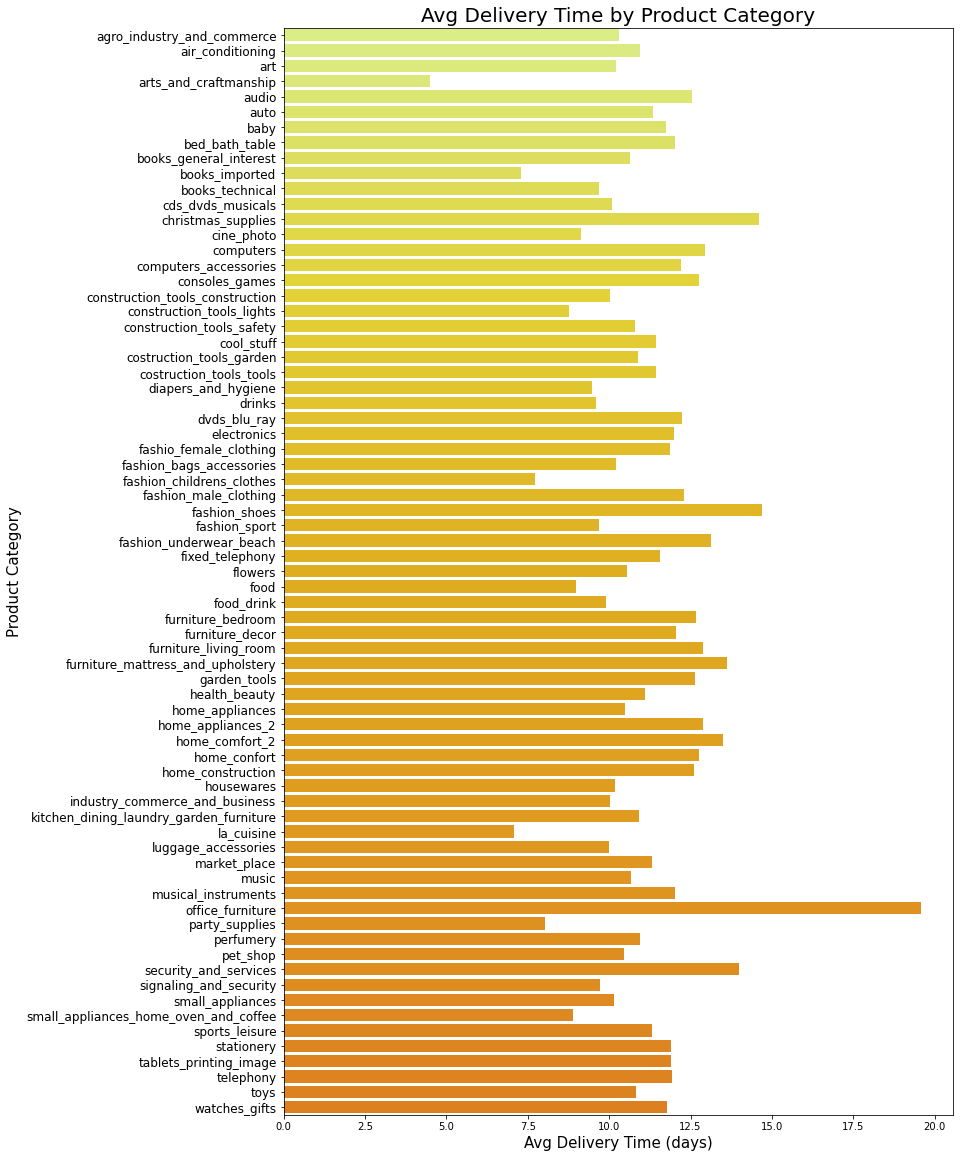

In [21]:
plt.figure(figsize=(12,20))
sns.barplot(data=temp_del_cat, y='product_category_name_english', x='delivery_leadtime', palette="Wistia")
plt.yticks(fontsize=12)
plt.xlabel("Avg Delivery Time (days)", fontsize=15)
plt.ylabel("Product Category", fontsize=15)
plt.title("Avg Delivery Time by Product Category", fontsize=20)

#### Top 10

In [22]:
temp_del_cat = temp_del_cat.sort_values(by='delivery_leadtime', ascending=False)
top_10 = temp_del_cat[:10]
top_10.reset_index(drop=True, inplace=True)
top_10

,product_category_name_english,delivery_leadtime
0,office_furniture,19.588006
1,fashion_shoes,14.681102
2,christmas_supplies,14.606299
3,security_and_services,14.000000
4,furniture_mattress_and_upholstery,13.621622
5,home_comfort_2,13.500000
6,fashion_underwear_beach,13.127119
7,computers,12.932203
8,furniture_living_room,12.886256
9,home_appliances_2,12.881057


#### Bottom 10

In [23]:
# Bottom 10
temp_del_cat = temp_del_cat.sort_values(by='delivery_leadtime', ascending=True)
bottom_10 = temp_del_cat[:10]
bottom_10.reset_index(drop=True, inplace=True)
bottom_10

,product_category_name_english,delivery_leadtime
0,arts_and_craftmanship,4.500000
1,la_cuisine,7.076923
2,books_imported,7.285714
3,fashion_childrens_clothes,7.714286
4,party_supplies,8.026316
5,construction_tools_lights,8.763265
6,small_appliances_home_oven_and_coffee,8.904110
7,food,8.972973
8,cine_photo,9.140625
9,diapers_and_hygiene,9.480000


## <span style="color:red"> [Task 2] Average delivery time by product area and weight </span>

#### Product Weight and Dimension
Product dimension = weight x height x length

In [24]:
# there are multiple order_id for each product_id.
    # drop order_id, then group by product_id to remove duplicated product info.
df_products_delivery.head()

,order_id,product_id,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,8,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,2,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,4,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,13,500.0,19.0,8.0,13.0,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,12,400.0,19.0,13.0,19.0,perfumery


In [25]:
# average delivery_leadtime for each product_id
temp_3 = pd.DataFrame(df_products_delivery.groupby(by=['product_id'])['delivery_leadtime'].mean().reset_index())
temp_3

,product_id,delivery_leadtime
0,00066f42aeeb9f3007548bb9d3f33c38,17.0
1,00088930e925c41fd95ebfe695fd2655,10.0
2,0009406fd7479715e4bef61dd91f2462,14.0
3,000b8f95fcb9e0096488278317764d19,6.0
4,000d9be29b5207b54e86aa1b1ac54872,7.0
...,...,...
31609,fff6177642830a9a94a0f2cba5e476d1,8.0
31610,fff81cc3158d2725c0655ab9ba0f712c,2.0
31611,fff9553ac224cec9d15d49f5a263411f,9.0
31612,fffdb2d0ec8d6a61f0a0a0db3f25b441,6.2


In [26]:
# temporary dataframe that excludes order_id and each order_id's delivery leadtime
df_products_delivery_temp = df_products_delivery.drop(['order_id', 'delivery_leadtime'], axis=1)
df_products_delivery_temp.head()

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares
1,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares
2,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares
3,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares
4,595fac2a385ac33a80bd5114aec74eb8,400.0,19.0,13.0,19.0,perfumery


In [27]:
# join together to leave only needed data with unique product_id
temp_del_size = pd.merge(temp_3, df_products_delivery_temp, how='inner', on=['product_id'])
temp_del_size.drop_duplicates(inplace=True)
temp_del_size.reset_index(drop=True, inplace=True)
temp_del_size.shape

(31614, 7)

In [28]:
temp_del_size.head()

,product_id,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,17.0,300.0,20.0,16.0,16.0,perfumery
1,00088930e925c41fd95ebfe695fd2655,10.0,1225.0,55.0,10.0,26.0,auto
2,0009406fd7479715e4bef61dd91f2462,14.0,300.0,45.0,15.0,35.0,bed_bath_table
3,000b8f95fcb9e0096488278317764d19,6.0,550.0,19.0,24.0,12.0,housewares
4,000d9be29b5207b54e86aa1b1ac54872,7.0,250.0,22.0,11.0,15.0,watches_gifts


In [29]:
# dimension(cm^3) = (length x height x width)cm
temp_del_size['product_dimension_cm3'] = temp_del_size['product_length_cm']*temp_del_size['product_height_cm']*temp_del_size['product_width_cm']
temp_del_size.head()

,product_id,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_dimension_cm3
0,00066f42aeeb9f3007548bb9d3f33c38,17.0,300.0,20.0,16.0,16.0,perfumery,5120.0
1,00088930e925c41fd95ebfe695fd2655,10.0,1225.0,55.0,10.0,26.0,auto,14300.0
2,0009406fd7479715e4bef61dd91f2462,14.0,300.0,45.0,15.0,35.0,bed_bath_table,23625.0
3,000b8f95fcb9e0096488278317764d19,6.0,550.0,19.0,24.0,12.0,housewares,5472.0
4,000d9be29b5207b54e86aa1b1ac54872,7.0,250.0,22.0,11.0,15.0,watches_gifts,3630.0


#### Product Dimension x Delivery Lead Time

In [30]:
temp_del_size.describe()

,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_dimension_cm3
count,31614.000000,31614.000000,31614.000000,31614.000000,31614.000000,31614.000000
mean,11.256161,2268.773518,30.820965,16.889891,23.177769,16443.951256
std,8.332439,4262.458598,16.904546,13.583985,12.041287,26822.823548
min,-5.000000,0.000000,7.000000,2.000000,6.000000,168.000000
25%,6.000000,300.000000,18.000000,8.000000,15.000000,2880.000000
50%,9.666667,700.000000,25.000000,13.000000,20.000000,6804.000000
75%,14.000000,1900.000000,38.000000,20.000000,30.000000,18375.000000
max,194.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000


In [31]:
# remove a row with delivery_leadtime <= 0
temp_del_size = temp_del_size[temp_del_size['delivery_leadtime'] > 0]
temp_del_size.describe()

,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_dimension_cm3
count,31570.000000,31570.000000,31570.000000,31570.000000,31570.000000,31570.000000
mean,11.272736,2269.391543,30.824897,16.887678,23.179031,16444.134780
std,8.326216,4263.720050,16.906600,13.578594,12.042188,26826.127637
min,0.500000,0.000000,7.000000,2.000000,6.000000,168.000000
25%,6.000000,300.000000,18.000000,8.000000,15.000000,2880.000000
50%,9.696154,700.000000,25.000000,13.000000,20.000000,6804.000000
75%,14.000000,1900.000000,38.000000,20.000000,30.000000,18375.000000
max,194.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000


In [32]:
corr = temp_del_size.corr(method='pearson')
corr

,delivery_leadtime,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_dimension_cm3
delivery_leadtime,1.000000,0.089258,0.083906,0.051172,0.056617,0.072701
product_weight_g,0.089258,1.000000,0.475713,0.564718,0.528294,0.806734
product_length_cm,0.083906,0.475713,1.000000,0.200355,0.542100,0.539380
product_height_cm,0.051172,0.564718,0.200355,1.000000,0.309691,0.711367
product_width_cm,0.056617,0.528294,0.542100,0.309691,1.000000,0.638004
product_dimension_cm3,0.072701,0.806734,0.539380,0.711367,0.638004,1.000000


#### Visualization

Text(0.5, 1.0, 'Product and Delivery Leadtime')

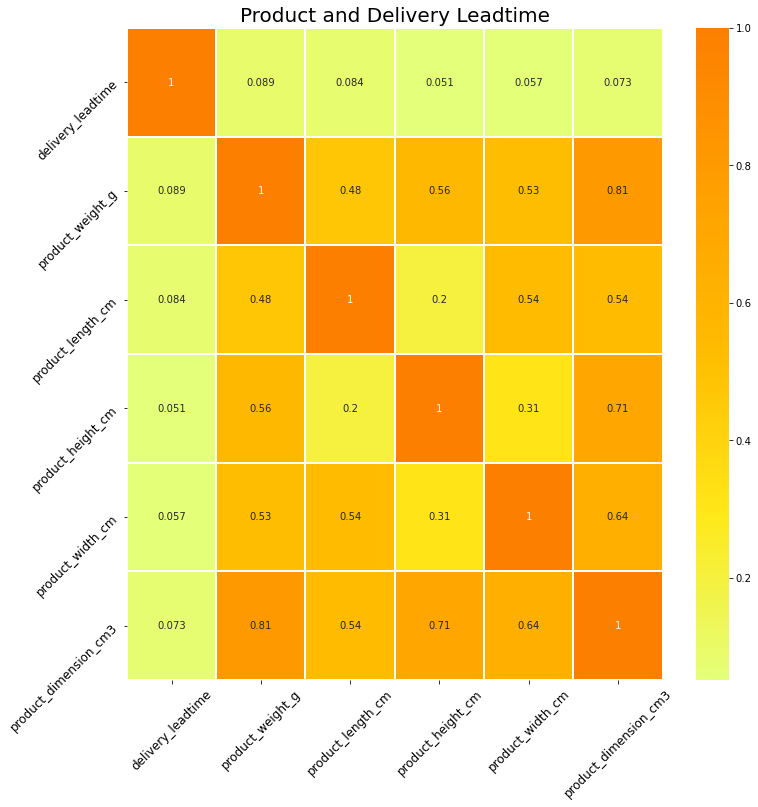

In [33]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot=True, linewidths=1, cmap="Wistia")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.title("Product and Delivery Leadtime", fontsize=20)

#### Result
* <b> Correlation </b>
    - Do not need to concern the correlation between dimension and either of width, length, height
        - Because dimension is the product of width, length, height
    - Weight has slightly stronger positive relationships (0.089) with delivery leadtime compared to dimension (0.073).
        - However, the correlation coefficient is very small. No strong relationship.
    - Heavier products are likely to have larger volume.
        - Correlation coefficient btw weight and dimension is 0.81